In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import datetime
import tensorflow as tf

from IPython.display import clear_output
from time import sleep
from livelossplot.tf_keras import PlotLossesCallback
from tensorflow import keras as keras

from keras.layers import Conv2D,Dropout,Dense,Flatten
from keras.models import Sequential

from keras.layers.advanced_activations import LeakyReLU
from keras.models import Sequential, Model
from keras.layers import  ReLU, Activation, Convolution2D, MaxPooling2D, BatchNormalization, Flatten, Dense, Dropout, Conv2D, MaxPool2D, ZeroPadding2D
from keras.optimizers import Adam, SGD
from keras.callbacks import TensorBoard

%matplotlib inline
%load_ext tensorboard

print("tensorflow version : ${}".format(tf.__version__))

tensorflow version : $1.15.0


Using TensorFlow backend.


In [2]:
# Use GPU if anabled
# 
import tensorflow as tf
sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))

from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

from keras import backend as K
K.tensorflow_backend._get_available_gpus()

Device mapping:
/job:localhost/replica:0/task:0/device:XLA_CPU:0 -> device: XLA_CPU device

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 8908092068940335806
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 5663596406021970936
physical_device_desc: "device: XLA_CPU device"
]


[]

In [3]:
input_training = pd.read_csv('./training.csv')  
input_test = pd.read_csv('./test.csv')
inpup_lookup = pd.read_csv('./IdLookupTable.csv')

IMAGE_WIDTH = 96
IMAGE_HEIGHT = 96

ROWS_COUNT_TRAINING = 7049
ROWS_COUNT_TEST = 1783

In [4]:
# Fill missing data in training data
# 

# train_data.head().T
input_training.isnull().any().value_counts()
input_training.fillna(method = 'ffill',inplace = True)
#train_data.reset_index(drop = True,inplace = True)
input_training.isnull().any().value_counts()


False    31
dtype: int64

In [5]:
# training data X
#
imag = []
for i in range(0, ROWS_COUNT_TRAINING):
    img = input_training['Image'][i].split(' ')
    img = ['0' if x == '' else x for x in img]
    imag.append(img)
    
image_list = np.array(imag, dtype = 'float')
X_train = image_list.reshape(-1, IMAGE_WIDTH, IMAGE_HEIGHT, 1)

In [6]:
# training data Y
#
training = input_training.drop('Image', axis = 1)

y_train = []
for i in range(0, ROWS_COUNT_TRAINING):
    y = training.iloc[i,:]
    y_train.append(y)
    
y_train = np.array(y_train,dtype = 'float')

In [7]:
# test data X
# 
timag = []
for i in range(0, ROWS_COUNT_TEST):
    timg = input_test['Image'][i].split(' ')
    timg = ['0' if x == '' else x for x in timg]
    timag.append(timg)
    
timage_list = np.array(timag,dtype = 'float')
X_test = timage_list.reshape(-1, IMAGE_WIDTH, IMAGE_HEIGHT, 1) 

In [8]:
# test data Y
#
test = input_test.drop('Image', axis = 1)

y_test = []
for i in range(0, ROWS_COUNT_TEST):
    y = test.iloc[i,:]
    y_test.append(y)
    
y_test = np.array(y_test,dtype = 'float')

In [9]:
def show_images(input_data, input_data_count):
    columns = 5
    rows = 5
    fig = plt.figure(figsize=(12, 12))
    for i in range(1, columns * rows + 1):
        fig.add_subplot(rows, columns, i)
        plt.imshow(input_data[np.random.randint(0, input_data_count)]
                   .reshape(IMAGE_WIDTH, IMAGE_HEIGHT), cmap='gray')
    plt.show()

In [10]:
def show_training_images():
    show_images(X_train, ROWS_COUNT_TRAINING)

In [11]:
def show_test_images():
    show_images(X_test, ROWS_COUNT_TEST)

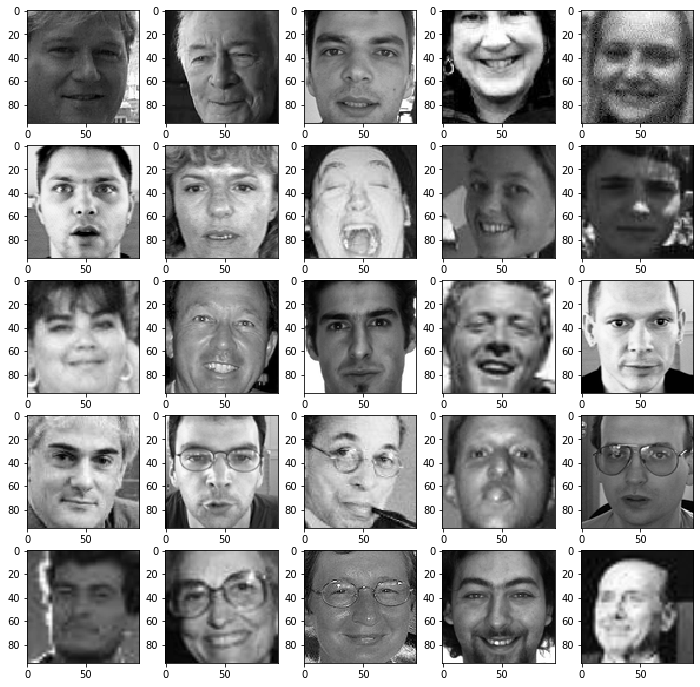

In [13]:
show_training_images()

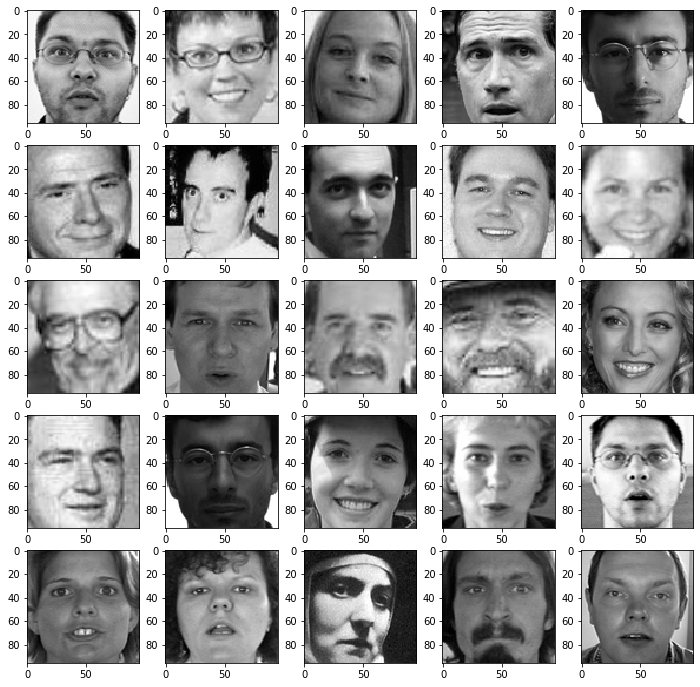

In [14]:
show_test_images()

In [15]:
# ?Flatten




In [12]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), activation="relu", input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, 1)))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPool2D(pool_size=2))

model.add(Flatten())
model.add(Dense(512, kernel_initializer='uniform', activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(30))

model.summary()

#---------------
# model = Sequential()

# model.add(Conv2D(filters=32, kernel_size=32, activation="relu", input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, 1)))
# model.add(MaxPool2D(pool_size=2))
# model.add(Dropout(0.2))

# model.add(Flatten())
# model.add(Dense(512, kernel_initializer='uniform', activation='relu'))
# model.add(Dropout(0.1))
# model.add(Dense(30))

# model.summary()

# --------------------
# model.add(Convolution2D(32, (3,3), padding='same', use_bias=False, input_shape=(96,96,1)))
# model.add(LeakyReLU(alpha = 0.1))
# model.add(BatchNormalization())

# model.add(Convolution2D(32, (3,3), padding='same', use_bias=False))
# model.add(LeakyReLU(alpha = 0.1))
# model.add(BatchNormalization())
# model.add(MaxPool2D(pool_size=(2, 2)))

# model.add(Convolution2D(64, (3,3), padding='same', use_bias=False))
# model.add(LeakyReLU(alpha = 0.1))
# model.add(BatchNormalization())

# model.add(Convolution2D(64, (3,3), padding='same', use_bias=False))
# model.add(LeakyReLU(alpha = 0.1))
# model.add(BatchNormalization())
# model.add(MaxPool2D(pool_size=(2, 2)))

# model.add(Convolution2D(96, (3,3), padding='same', use_bias=False))
# model.add(LeakyReLU(alpha = 0.1))
# model.add(BatchNormalization())

# model.add(Convolution2D(96, (3,3), padding='same', use_bias=False))
# model.add(LeakyReLU(alpha = 0.1))
# model.add(BatchNormalization())
# model.add(MaxPool2D(pool_size=(2, 2)))

# model.add(Convolution2D(128, (3,3),padding='same', use_bias=False))
# # model.add(BatchNormalization())
# model.add(LeakyReLU(alpha = 0.1))
# model.add(BatchNormalization())

# model.add(Convolution2D(128, (3,3),padding='same', use_bias=False))
# model.add(LeakyReLU(alpha = 0.1))
# model.add(BatchNormalization())
# model.add(MaxPool2D(pool_size=(2, 2)))

# model.add(Convolution2D(256, (3,3),padding='same',use_bias=False))
# model.add(LeakyReLU(alpha = 0.1))
# model.add(BatchNormalization())

# model.add(Convolution2D(256, (3,3),padding='same',use_bias=False))
# model.add(LeakyReLU(alpha = 0.1))
# model.add(BatchNormalization())
# model.add(MaxPool2D(pool_size=(2, 2)))

# model.add(Convolution2D(512, (3,3), padding='same', use_bias=False))
# model.add(LeakyReLU(alpha = 0.1))
# model.add(BatchNormalization())

# model.add(Convolution2D(512, (3,3), padding='same', use_bias=False))
# model.add(LeakyReLU(alpha = 0.1))
# model.add(BatchNormalization())


# model.add(Flatten())
# model.add(Dense(512,activation='relu'))
# model.add(Dropout(0.1))
# model.add(Dense(30))

# model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 94, 94, 32)        320       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 94, 94, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 47, 47, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 70688)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               36192768  
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
______________________________________

In [13]:
model.compile(optimizer=Adam(lr=0.001), 
              loss='mean_squared_error',
              metrics=['mae'])
# loss='sparse_categorical_crossentropy',

In [14]:
now = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
logdir = os.path.join("logs_miw_low", now)
tensorboard = TensorBoard(
    log_dir = logdir, 
#     write_graph = True,
#     write_grads = True,
    histogram_freq = 1,
#     write_images = True
)
callbacks = [tensorboard]

In [15]:
hist = model.fit(
    X_train, 
    y_train, 
    epochs = 10, 
    batch_size = 256, 
    validation_split = 0.2, 
    callbacks = callbacks, 
    verbose = 1
)


Train on 5639 samples, validate on 1410 samples



Epoch 1/10
5639/5639 [==============================] - 16s 3ms/step - loss: 87637.2277 - mae: 121.7692 - val_loss: 2525.6769 - val_mae: 45.8286

Epoch 2/10
5639/5639 [==============================] - 16s 3ms/step - loss: 2508.2924 - mae: 45.4389 - val_loss: 2485.8118 - val_mae: 45.3530
Epoch 3/10
5639/5639 [==============================] - 15s 3ms/step - loss: 2454.7394 - mae: 44.7388 - val_loss: 2425.3525 - val_mae: 44.6472
Epoch 4/10
5639/5639 [==============================] - 16s 3ms/step - loss: 2384.1783 - mae: 43.7235 - val_loss: 2328.8599 - val_mae: 43.0847
Epoch 5/10
5639/5639 [==============================] - 15s 3ms/step - loss: 2286.8886 - mae: 42.2492 - val_loss: 2213.6310 - val_mae: 41.8244
Epoch 6/10
5639/5639 [==============================] - 15s 3ms/step - loss: 2167.5758 - mae: 40.6178 - val_loss: 2048.6086 - val_mae: 39.3252
Epoch 7/10
5639/5639 [==============================] - 15s 3ms/step - loss: 2009.8760 

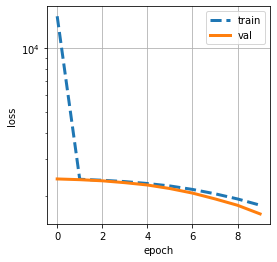

In [16]:
def show_loss_graph(history):
    plt.figure(figsize=(4,4))
    loss = history['loss']
    val_loss = history['val_loss']
    loss = np.sqrt(np.array(loss))*48 
    val_loss = np.sqrt(np.array(val_loss))*48 
    plt.plot(loss, "--", linewidth=3, label="train")
    plt.plot(val_loss, linewidth=3, label="val")
    plt.legend()
    plt.grid()
    plt.yscale("log")
    plt.xlabel("epoch")
    plt.ylabel("loss")
    plt.show()

show_loss_graph(hist.history)

In [17]:
model

In [18]:
pred = model.predict(X_test)

In [ ]:
def plot_sample(x, y, axis):
    img = x.reshape(96, 96)
    axis.imshow(img, cmap='gray')
    axis.scatter(y[0::2] * 48 + 48, y[1::2] * 48 + 48, marker='x', s=10)


fig = plt.figure(figsize=(10, 7))
fig.subplots_adjust(
    left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(16):
    axis = fig.add_subplot(4, 4, i+1, xticks=[], yticks=[])
    plot_sample(X_test[i], y_test[i], axis)

plt.show()

In [19]:
lookid_list = list(inpup_lookup['FeatureName'])
imageID = list(inpup_lookup['ImageId']-1)
pre_list = list(pred)

In [20]:
rowid = inpup_lookup['RowId']
rowid = list(rowid)


In [21]:
feature = []
for f in list(inpup_lookup['FeatureName']):
    feature.append(lookid_list.index(f))

In [22]:
preded = []
for x,y in zip(imageID,feature):
    preded.append(pre_list[x][y])

In [23]:
rowid = pd.Series(rowid,name = 'RowId')

In [24]:
loc = pd.Series(preded,name = 'Location')

In [25]:
submission = pd.concat([rowid,loc],axis = 1)

In [26]:
print(submission)

       RowId   Location
0          1  47.599068
1          2  29.252945
2          3   9.820744
3          4  13.919936
4          5  32.499378
...      ...        ...
27119  27120  10.856415
27120  27121  33.239426
27121  27122  43.091240
27122  27123  12.006784
27123  27124  57.088207

[27124 rows x 2 columns]


In [27]:
submission.to_csv('face_key_detection_submission.csv',index = False)